# Análise de Algoritmos

- Um algoritmo é um procedimento ou fórmula para resolver um problema
- Alguns são muitos importantes que recebem nomes especiais: merge sort, bubble sort, binary search
- A **grande questão** é: Como podemos comparar algoritmos para sabermos quais são melhores e mais eficientes?

Vejamos alguns exemplos

In [5]:
def soma_um(n):
    # Recebe n como input e retorna a soma dos números 0 até n
    soma_final = 0
    for x in range(n+1):
        soma_final += x
    return soma_final

In [6]:
print(soma_um(10))
print(soma_um(15))
print(soma_um(5))

55
120
15


In [7]:
def soma_dois(n):
    # Recebe n como input e retorna a soma dos números 0 até n
    return (n*(n+1))/2

In [8]:
print(soma_dois(5))
print(soma_dois(10))

15.0
55.0


A função **soma_um()** utiliza um *loop for* para adicionar iterativamente através de nosso **range + 1**.

A função **soma_dois()** faz uso de uma fórmula para resolver o problema

## Comparando-os Objetivamente

- Espaço de memória
- Tempo para rodar

In [9]:
# Vamos utilizar o comando mágico constrúido do jupyter-notebook
# Resultado em microsegundos
%timeit soma_um(100)

5.03 µs ± 158 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [10]:
%timeit soma_dois(100)
# ordem em nanosegundos por loop

168 ns ± 10.6 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


**MICRO** = 10^-6

**NANO** = 10^-9

Quanto menor o número, melhor o desempenho do nosso algoritmo

**Importante**

- Não podemos simplesmente depender em tempo de execução porque a maioria dos computadores são diferentes e alguns são mais rápidos do que outros
- Para que nossa avaliação seja independente do Hardware, precisamos de **Big O**

# Big O

Com Big O nós podemos objetivamente comparar a eficiência de algoritmos ao compararmos o número de atribuições que cada algoritmo faz.

A função **soma_um** irá criar uma atribuição n+1 vezes, podemos fazer essa observação baseado na função range. Isso significa que ele irá atribuir a variável **soma_final** n+1 vezes. Nós podemos então dizer que para um problema de tamanho n (nesse caso apenas um número n) essa função tomará n+1 passos

Essa notação n nos permite comparar soluções e algoritmos relativos ao tamanho do problema, uma vez que soma_um(10) e soma_um(100000) podem tomar diferentes tempos para rodar, porém utilizando o mesmo algoritmo. Nós também podemos perceber que ao n crescer para um número muito grande, o +1 não terá muito efeito. Sendo assim, vamos começar discutindo como construir uma sintáxe para essa notação.

Notação **Big-O** descreve quão rápido o tempo de execução irá aumentar relativo ao input ao ele crescer arbitrariamente grande.

## Quão bem o algoritmo escala ao crescerem os dados?

Lembrando, nós desejamos comparar quão rápido o tempo de execução irá crescer, não comparar tempo de execução exatos, uma vez que estes podem variar de acordo com o hardware.

Uma vez que nós queremos comparar para um variedade de tamanhos de input, nós estamos apenas preocupados com o crescimento do tempo de execução relativo ao input, é por isso que utilizamos essa notação.

Ao n se tornar arbitrariamente grande nós apenas nos preocupamos sobre os termos que irão crescer mais rápido ao n se tornar maior, nesse ponto, Análise Big-O também é conhecido como análise asimtótica.

Em Matemática, análise asimtótica = **descrever o comportamento limite**

- Qual parte do algoritmo tem o MAIOR efeito na resposta final, qual parte do algoritmo é o real gargalo, qual parte é o fator limite.
- Para a sintaxe **soma_um()** pode ser dito como **O(n)** uma vez que se tempo de execução cresce linearmente com o tamanho de input

In [11]:
def BigO(n):
    return 45*n**3 + 20*n**2 + 19
BigO(1)

84

In [13]:
BigO(2)
# Perceba que 19 não irá escalar ou será um fator limite

459

In [14]:
BigO(10)

47019

- Podemos perceber que 19 não possui mais um peso relevante
- O 20n**2 nesse caso é 2000
- O 45n**3 nesse caso é 45000

A parte desse algoritmo que realmente está ligado com a resposta final ao escalarem os dados não será 45, mas sim n**3. Então podemos dizer que ele é de ordem n^3

# Gráfico Big O

![img](https://i.imgur.com/EzN9jw6.png)

| Big-O         | Nome        |
| ------------- | ------      |
| 1             | Constante   |
| log(n)        | Logarítmico |
| n             | Linear      |
| n log(n)      | Log Linear  |
| n^2           | Quadrático  |
| n^3           | Cúbico      |
| 2^n           | Exponencial |

| Notação       | Nome        |
| ------------- | ------      |
| O(1)             | Constante   |
| O(log log n)        | Logarítmico dobrado |
| O(log n)             | Logarítmico      |
| O(n^c), 0 < c < 1      | potência fatorial  |
| O(n)           | Linear  |
| O(n log * n)           | n log-star n      |
| O(n log n) = O(log n!)           | Linearítmico, Log Linear |
| O(n^2)           | Quadrático |
| O(n^c), c > 1           | Polinomial |
| O(c^n), c > 1           | Exponencial |
| O(n!)           | Fatorial |

Text(0.5, 0, 'n')

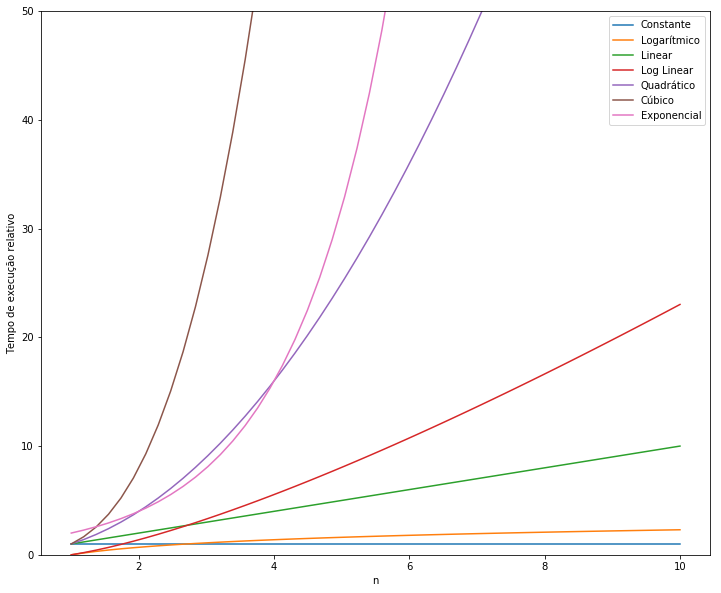

In [18]:
from math import log
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Setamos as comparações em tempo de execução
n = np.linspace(1,10)
rotulos = ['Constante', 'Logarítmico', 'Linear', 'Log Linear', 'Quadrático', 'Cúbico', 'Exponencial']
big_o = [np.ones(n.shape), np.log(n), n, n*np.log(n), n**2, n**3, 2**n]

# Plotagem
plt.figure(figsize=(12,10))
plt.ylim(0,50)

for i in range(len(big_o)):
    plt.plot(n,big_o[i],label=rotulos[i])

plt.legend(loc=0)
plt.ylabel('Tempo de execução relativo')
plt.xlabel('n')

Claramente nosso objetivo é escolher um algoritmo que esteja distante de qualquer comportamento quadrático, cúbico e exponencial

# Exemplos Big O

## O(1) Constante

In [20]:
def funcao_constante(valores):
    # Imprime o primeiro elemento de uma lista de valores
    print(valores[0])

funcao_constante([1,2,3,4,5,6])

1


Não importa quão grande a lista se torne, a função/algoritmo irá apenas pegar o valor indexado na posição 0 da lista

## O(n) Linear

In [22]:
def funcao_linear(lista):
    # Recebe uma lista e imprime todos os valores
    for valores in lista:
        print(valores)

funcao_linear([1,2,3,4,5]) # O crescimento da lista tem um impacto no desempenho

1
2
3
4
5


Cada valor da lista será impresso ao passar pelo for, então ao crescer a lista, cresce o Big O, então podemos dizer que esse algoritmo irá escalar linearmente com n.

## O(n^2) Quadrático

In [3]:
def funcao_quadratica(lista):
    # Imprime pares para cada elemento na lista
    for item_1 in lista:
        for item_2 in lista:
            print(item_1,item_2)
lista = [1,2,3]
funcao_quadratica(lista)

1 1
1 2
1 3
2 1
2 2
2 3
3 1
3 2
3 3


- Dois loops aninhados
- Para uma lista de n itens, nós teremos de executar n operações para cada item na lista! Isso significa em total que iremos executar n vezes n atribuições, ou n^2. Então uma lista com 10 itens terá 10^2 ou 100 operações. Você pode perceber quão perigoso isso pode se tornar para inputs muito grandes! É por isso que a **Notação Big O** é tão importante para entendermos.
- Então, baseado no exemplo: o input de 3 nos dá 9 iterações de output

## Calculando a escala de Big O

Termos insignificantes são desconsiderados na notação Big O

Quando se trata de Notação Big O nós apenas nos preocupamos com os termos mais significantes, lembre que ao crescer o input e ele se tornar maior apenas os termos que crescem com maior rapidez terão importância/relevância.

Por exemplo, tomar o limite a respeito da infinidade

In [4]:
def imprima_uma_vez(lista):
    # Imprime todos os itens uma vez
    for valores in lista:
        print(valores)

imprima_uma_vez(lista)

# É possível perceber como esse crescimento é linear em relação ao input?
# O(n)

1
2
3


In [5]:
def imprima_tres_vezes(lista):
    # Imprime todos os itens três vezes
    for valores in lista:
        print(valores)
    
    for valores in lista:
        print(valores)
        
    for valores in lista:
        print(valores)

imprima_tres_vezes(lista)

1
2
3
1
2
3
1
2
3


Este algoritmo irá executar 3 vezes para cada n, sendo assim ele se torna de ordem 3(n). Continuando assim, linear. Mais importante, 3(infinidade) não é realmente diferente de (infinidade), sendo assim podemos abandonar as constantes insignificantes.

Podemos então dizer que este algoritmo é O(n)

In [6]:
def computacao(lista):
    # Essa função imprime o primeiro item O(1), sendo assim ela é constante
    # Depois ela imprime o primeiro 1/2 da lista O(n/2)
    # Depois ela imprime uma string 10 vezes O(10), sendo assim constante
    print(lista[0])
    
    ponto_medio = len(lista)//2
    
    for valores in lista[:ponto_medio]:
        print(valores)
    
    for x in range(10):
        print('numero')

In [7]:
lista = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
computacao(lista)

1
1
2
3
4
5
6
7
numero
numero
numero
numero
numero
numero
numero
numero
numero
numero


## O(1 + n/2 + 10)

Ao n se tornar maior e maior (escalar) nós podemos facilmente percerber como o 1 e o 10 começam a se tornar irrelevantes e posteriormente o //2 também começará a não ter efeito.

Podemos então concluir que esse algoritmo é de ordem O(n)

# Pior Caso vs Melhor Caso

Muitas vezes nós estamos apenas preocupados com o pior possível caso de um algoritmo. É importante termos em mente que os cenários de pior caso e o melhor caso podem ser completamente diferentes em questão de tempo Big-O.

In [8]:
def matcher(lista,match):
    # Dada uma lista chamada lista, retorna um booelano indicando se determinado item está presente na lista
    for item in lista:
        if item == match:
            return True
    return False

In [9]:
lista

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [12]:
matcher(lista,1) # Esse é o melhor caso, pois o item buscado está no índice 0. O(1) o melhor caso se torna constante

True

In [11]:
matcher(lista,25)# Esse é o pior caso, a lista inteira deve ser vasculhada, n elementos. O(n) o pior caso se torna linear

False

# Complexidade do Espaço

Também interesse com a quantidade de memória/espaço que um algoritmo utiliza. A notação de complexidade de espaço é a mesma, mas ao invés de checar operações de tempo, nós checamos o tamanho de alocação de memória.

In [13]:
def memoria(n=10):
    # Imprime "Hello world!" n vezes
    for x in range(n): # Complexidade de tempo O(n)
        print("Memoria!") # Complexidade de espaço O(1)

memoria(10)

Memoria!
Memoria!
Memoria!
Memoria!
Memoria!
Memoria!
Memoria!
Memoria!
Memoria!
Memoria!


O(n) para a complexidade de tempo, mas e a respeito da complexidade de espaço?

Em memória ele não necessita guardar 10 versões  de "Memoria!", ele apenas precisa guardar uma string. O(1)

# Sequências de Array

LISTA [ ]

TUPLA ( )

STRING (" ") 

Todos suportam indexação

Para entendermos melhor como os arrays funcionam é importante entendermos a arquitetura de computadores em baixo nível

- Memória é armazenada em **bits**
- 8 **bits** = 1 **byte**
- Endereço de memória para cada **byte**

![img](https://i.imgur.com/iMpZnPt.jpg)

Guardado e recuperado em O(1) tempo constante.

Python representa carácteres UNICODE com 16 bits (2 bytes)

![img](https://i.imgur.com/BkMeUyi.png)

Nesse caso, SAMPLE possui 6 carácteres, ou seja, 12 bytes

- ARRAY de 6 carácteres
- Cada carácter ocupa uma célula
- Índice descreve localização

Apenas para ilustrar o conhecimento, pois iremos utilizar abstrações de alto nível

# Listas e Referências

Criada uma lista chamada de primes, guardando números primos.

Se for criado um novo objeto **temp**, e sendo ele uma referência a uma porção da lista prime, então foi criado uma nova lista, porém referenciando uma localização de índice de saída.

![img](https://i.imgur.com/m8TV3eo.png)

Se desejarmos alterar uma atribuição indexada na nova lista **temp**...

temp[2] = 15

A lista original não é alterada, a nova posição indexada apenas aponta para um novo e diferente objeto.

Importante Lembrar: novas listas criam uma cópia superficial, significa que você está apenas alterando/criando seus ponteiros e não duplicando objetos em memória.

Muito do que estamos fazendo é manipular referências e chamadas, não os objetos em si.

In [16]:
import sys

n = 10
dados = []

for i in range(n):
    a = len(dados)
    b = sys.getsizeof(dados)
    print('Comprimento: {0:3d};  Tamanho em Bytes: {1:4d}'.format(a,b))
    dados.append(n)

Comprimento:   0;  Tamanho em Bytes:   64
Comprimento:   1;  Tamanho em Bytes:   96
Comprimento:   2;  Tamanho em Bytes:   96
Comprimento:   3;  Tamanho em Bytes:   96
Comprimento:   4;  Tamanho em Bytes:   96
Comprimento:   5;  Tamanho em Bytes:  128
Comprimento:   6;  Tamanho em Bytes:  128
Comprimento:   7;  Tamanho em Bytes:  128
Comprimento:   8;  Tamanho em Bytes:  128
Comprimento:   9;  Tamanho em Bytes:  192


# Arrays Dinâmicos

## Problema

Dadas duas strings, cheque-as para ver se elas são anagramas. Um anagrama é quando as duas strings podem ser reescritas usando exatamente as mesmas letras (sendo assim você pode apenas reorganizar as letras para obter uma frase ou palavra diferente)

Por exemplo:

"Pedro" é um anagrama de "Poder"

"Client Eastwood" é um anagrama de "old west action"

Nota: Ignore espaços e capitalização. Sendo assim, "d go" é um anagrama de "God" e "dog" um anagrama de "o d g".

In [17]:
def anagrama(string1,string2):
    # Remove espaços e letras lower case
    string1 = string1.replace(' ','').lower()
    string2 = string2.replace(' ','').lower()
    
    # Retorna um booleano para a match sortida
    return sorted(string1) == sorted(string2)

In [18]:
anagrama('pedro','poder')

True

In [19]:
anagrama('teste','peste')

False

In [20]:
anagrama('gol','log')

True

Esta solução não é otimizada, uma vez que estamos utilizando um módulo de Python. 

Vamos tentar agora com contadores e dicionários.

In [25]:
def anagrama_dois(string1,string2):
    string1 = string1.replace(' ','').lower()
    string2 = string2.replace(' ','').lower()
    
    # Checa se há o mesmo número de letras
    if len(string1) != len(string2):
        return False
    
    # Conta a frequência de cada letra
    contador = {}
    
    for letra in string1: # Para cada letra na primeira string
        if letra in contador: # Se a letra já está em nosso dicionário, então
            contador[letra] += 1 # Adiciona 1 para a chave letra do dicionário
        else:
            contador[letra] = 1
    
    # Faz o reverso para a segunda string
    for letra in string2:
        if letra in contador:
            contador[letra] -= 1
        else:
            contador[letra] = 1
    
    for k in contador: # Percorremos o contador
        if contador[k] != 0: # Caso o contador nos retorne um valor diferente de 0, indica que não obtivemos um anagrama
            return False
    
    return True

x = anagrama_dois('Clint Eastwood', 'old WEST action')
y = anagrama_dois('Testando anagrama dois', 'Testando o anagrama dois')
z = anagrama_dois('bolo', 'lobo')
print(x)
print(y)
print(z)

True
False
True
